## 3.4 - Multi-class classification - predicting a label (out of many)

#### Get the data

In [1]:
from sklearn.datasets import load_digits

digits = load_digits()

In [2]:
print(digits.DESCR)

Optical Recognition of Handwritten Digits Data Set

Notes
-----
Data Set Characteristics:
    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an input matrix of 8x8 where each element is a

In [3]:
len(digits.images)

1797

In [4]:
digits.images[50]

array([[ 0.,  0.,  0.,  5., 14., 12.,  2.,  0.],
       [ 0.,  0.,  7., 15.,  8., 14.,  4.,  0.],
       [ 0.,  0.,  6.,  2.,  3., 13.,  1.,  0.],
       [ 0.,  0.,  0.,  1., 13.,  4.,  0.,  0.],
       [ 0.,  0.,  1., 11.,  9.,  0.,  0.,  0.],
       [ 0.,  8., 16., 13.,  0.,  0.,  0.,  0.],
       [ 0.,  5., 14., 16., 11.,  2.,  0.,  0.],
       [ 0.,  0.,  0.,  6., 12., 13.,  3.,  0.]])

In [5]:
digits.images[50].shape

(8, 8)

In [6]:
digits.data[50]

array([ 0.,  0.,  0.,  5., 14., 12.,  2.,  0.,  0.,  0.,  7., 15.,  8.,
       14.,  4.,  0.,  0.,  0.,  6.,  2.,  3., 13.,  1.,  0.,  0.,  0.,
        0.,  1., 13.,  4.,  0.,  0.,  0.,  0.,  1., 11.,  9.,  0.,  0.,
        0.,  0.,  8., 16., 13.,  0.,  0.,  0.,  0.,  0.,  5., 14., 16.,
       11.,  2.,  0.,  0.,  0.,  0.,  0.,  6., 12., 13.,  3.,  0.])

In [9]:
digits.data[50].shape

(64,)

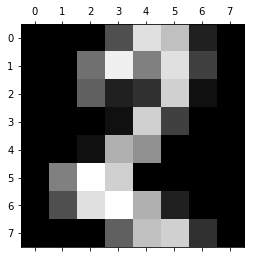

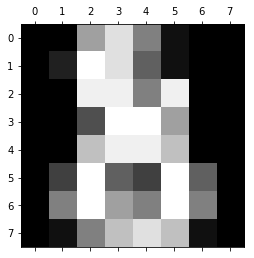

In [8]:
%matplotlib inline

import matplotlib.pyplot as plt

plt.gray()
plt.matshow(digits.images[50]) 

In [10]:
digits.target[50]

2

#### Classification

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(digits.data, digits.target, test_size=0.2, random_state=0)

In [13]:
from sklearn.svm import LinearSVC

classifier = LinearSVC(random_state=0)  # one-vs-rest by default
classifier.fit(X_train, Y_train)

Y_pred = classifier.predict(X_test)

In [14]:
from sklearn.metrics import classification_report

print(classification_report(Y_test, Y_pred))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        27
          1       0.81      0.83      0.82        35
          2       0.97      0.92      0.94        36
          3       0.88      1.00      0.94        29
          4       1.00      1.00      1.00        30
          5       0.97      0.95      0.96        40
          6       0.96      0.98      0.97        44
          7       1.00      0.95      0.97        39
          8       0.83      0.90      0.86        39
          9       0.97      0.88      0.92        41

avg / total       0.94      0.94      0.94       360



In [15]:
from sklearn.multiclass import OneVsOneClassifier

classifier = OneVsOneClassifier(LinearSVC(random_state=0))
classifier.fit(X_train, Y_train)

Y_pred = classifier.predict(X_test)

print(classification_report(Y_test, Y_pred))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        27
          1       0.92      0.97      0.94        35
          2       0.97      1.00      0.99        36
          3       0.97      1.00      0.98        29
          4       1.00      1.00      1.00        30
          5       0.97      0.97      0.97        40
          6       1.00      0.98      0.99        44
          7       1.00      1.00      1.00        39
          8       0.97      0.92      0.95        39
          9       0.97      0.95      0.96        41

avg / total       0.98      0.98      0.98       360



#### Cross-validation

In [16]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

cv = KFold(n_splits=10, shuffle=True, random_state=0)

cross_val_score(classifier, digits.data, digits.target, cv=cv, scoring='f1_macro').mean()

0.9828692050683845

In [17]:
cross_val_score(classifier, digits.data, digits.target, cv=cv, scoring='f1_micro').mean()

0.9827560521415271